# IMPORT DATASET

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/dataset-twitter-covid-19.csv')

In [3]:
df.head()

,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,https://bit.ly/2L6CcbB | Seharusnya saat ini...,[],0,3,0,[]
1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,Klo kata gw Pemerintah tuh lagi menerapkan Her...,['mas__piyuuu'],0,0,0,[]
2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,Saat ini yang bisa saya lakukan hanya menyiapk...,['oiivert'],0,0,0,[]
3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,"Satu Warga Positif Corona, Bupati: Kondisi ini...",[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,"emosi bgt, lg kondisi begini gue disuruh liput...",[],0,0,0,['#dirumahaja']


# PREPROCESSING

## Case Folding

In [4]:
import string
import re

In [5]:
# mengganti ke huruf kecil semua
df['tweet'] = df['tweet'].str.lower()

In [6]:
def remove_tweet_special(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

# menghapus angka
def remove_number(text):
    return  re.sub(r"\d+", "", text)

# menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

# menghapus spasi di awal & akhir
def remove_whitespace_LT(text):
    return text.strip()

# menghapus beberapa spasi menjadi satu spasi
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# menghapus karakter tunggal
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)


In [7]:
df['tweet'] = df['tweet'].apply(remove_tweet_special)
df['tweet'] = df['tweet'].apply(remove_number)
df['tweet'] = df['tweet'].apply(remove_punctuation)
df['tweet'] = df['tweet'].apply(remove_whitespace_LT)
df['tweet'] = df['tweet'].apply(remove_whitespace_multiple)
df['tweet'] = df['tweet'].apply(remove_singl_char)

In [8]:
df['tweet'].head()

0    seharusnya saat ini pemerintah lampung bisa me...
1    klo kata gw pemerintah tuh lagi menerapkan her...
2    saat ini yang bisa saya lakukan hanya menyiapk...
3    satu warga positif corona bupati kondisi ini m...
4    emosi bgt lg kondisi begini gue disuruh liputa...
Name: tweet, dtype: object

## Tokenizing

In [9]:
# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [10]:
# NLTK word rokenize 
def word_tokenize_wrapper(text):
   return word_tokenize(text)

In [11]:
df['tokenized_tweet'] = df['tweet'].apply(word_tokenize_wrapper)

In [12]:
df[['tweet','tokenized_tweet']].head()

,tweet,tokenized_tweet
0,seharusnya saat ini pemerintah lampung bisa me...,"[seharusnya, saat, ini, pemerintah, lampung, b..."
1,klo kata gw pemerintah tuh lagi menerapkan her...,"[klo, kata, gw, pemerintah, tuh, lagi, menerap..."
2,saat ini yang bisa saya lakukan hanya menyiapk...,"[saat, ini, yang, bisa, saya, lakukan, hanya, ..."
3,satu warga positif corona bupati kondisi ini m...,"[satu, warga, positif, corona, bupati, kondisi..."
4,emosi bgt lg kondisi begini gue disuruh liputa...,"[emosi, bgt, lg, kondisi, begini, gue, disuruh..."


In [13]:
# digunakan untuk seleksi fitur tf-idf
def freqDist_wrapper(text):
    return FreqDist(text)

df['tokenized_freq'] = df['tokenized_tweet'].apply(freqDist_wrapper)

print(df['tokenized_freq'].head().apply(lambda x : x.most_common()))

0    [(lampung, 2), (seharusnya, 1), (saat, 1), (in...
1    [(pemerintah, 2), (klo, 1), (kata, 1), (gw, 1)...
2    [(untuk, 3), (dan, 2), (di, 2), (tidak, 2), (s...
3    [(bantaeng, 3), (satu, 1), (warga, 1), (positi...
4    [(gue, 3), (disuruh, 2), (liputan, 2), (emosi,...
Name: tokenized_freq, dtype: object


## Filtering

In [14]:
tweet_data = df[['tweet', 'tokenized_tweet', 'tokenized_freq']]

In [15]:
tweet_data.head()

,tweet,tokenized_tweet,tokenized_freq
0,seharusnya saat ini pemerintah lampung bisa me...,"[seharusnya, saat, ini, pemerintah, lampung, b...","{'seharusnya': 1, 'saat': 1, 'ini': 1, 'pemeri..."
1,klo kata gw pemerintah tuh lagi menerapkan her...,"[klo, kata, gw, pemerintah, tuh, lagi, menerap...","{'klo': 1, 'kata': 1, 'gw': 1, 'pemerintah': 2..."
2,saat ini yang bisa saya lakukan hanya menyiapk...,"[saat, ini, yang, bisa, saya, lakukan, hanya, ...","{'saat': 1, 'ini': 1, 'yang': 1, 'bisa': 1, 's..."
3,satu warga positif corona bupati kondisi ini m...,"[satu, warga, positif, corona, bupati, kondisi...","{'satu': 1, 'warga': 1, 'positif': 1, 'corona'..."
4,emosi bgt lg kondisi begini gue disuruh liputa...,"[emosi, bgt, lg, kondisi, begini, gue, disuruh...","{'emosi': 1, 'bgt': 1, 'lg': 1, 'kondisi': 1, ..."


In [16]:
from nltk.corpus import stopwords

In [17]:
# stopword indonesia dari NTLK library
list_stopwords = stopwords.words('indonesian')

# tambahan stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# stopword dari file
txt_stopword = pd.read_csv("stopwords\indonesian", names= ["stopwords"], header = None)

# tambahkan stopword dari file ke list_stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# konversi daftar ke kamus
list_stopwords = set(list_stopwords)

In [18]:
# hapus stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet_data['filtering_tweet'] = tweet_data['tokenized_tweet'].apply(stopwords_removal)

C:\Users\akbar\AppData\Local\Temp\ipykernel_10616\3011108915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['filtering_tweet'] = tweet_data['tokenized_tweet'].apply(stopwords_removal)


In [19]:
tweet_data[['tokenized_tweet', 'filtering_tweet']].head()

,tokenized_tweet,filtering_tweet
0,"[seharusnya, saat, ini, pemerintah, lampung, b...","[pemerintah, lampung, bantuan, mahasiswa, dera..."
1,"[klo, kata, gw, pemerintah, tuh, lagi, menerap...","[gw, pemerintah, menerapkan, herd, immunity, k..."
2,"[saat, ini, yang, bisa, saya, lakukan, hanya, ...","[lakukan, makanan, berbuka, sahur, kepala, kel..."
3,"[satu, warga, positif, corona, bupati, kondisi...","[warga, positif, corona, bupati, kondisi, menu..."
4,"[emosi, bgt, lg, kondisi, begini, gue, disuruh...","[emosi, bgt, lg, kondisi, gue, disuruh, liputa..."


## Word Handling

In [20]:
lexicon = pd.read_csv('lexicon\colloquial-indonesian-lexicon.csv')

In [21]:
lexicon[['slang', 'formal']].head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [22]:
# merubah kata slang/tidak baku/typo ke kata formal/baku
katabaku_dict = {}

for index, row in lexicon.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1] 

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]

tweet_data['wordhandling_tweet'] = tweet_data['filtering_tweet'].apply(normalized_term)

C:\Users\akbar\AppData\Local\Temp\ipykernel_10616\1508137338.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in katabaku_dict:
C:\Users\akbar\AppData\Local\Temp\ipykernel_10616\1508137338.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  katabaku_dict[row[0]] = row[1]


C:\Users\akbar\AppData\Local\Temp\ipykernel_10616\1508137338.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['wordhandling_tweet'] = tweet_data['filtering_tweet'].apply(normalized_term)


In [23]:
tweet_data[['tokenized_tweet', 'filtering_tweet', 'wordhandling_tweet']].head()

,tokenized_tweet,filtering_tweet,wordhandling_tweet
0,"[seharusnya, saat, ini, pemerintah, lampung, b...","[pemerintah, lampung, bantuan, mahasiswa, dera...","[pemerintah, lampung, bantuan, mahasiswa, dera..."
1,"[klo, kata, gw, pemerintah, tuh, lagi, menerap...","[gw, pemerintah, menerapkan, herd, immunity, k...","[gue, pemerintah, menerapkan, herd, immunity, ..."
2,"[saat, ini, yang, bisa, saya, lakukan, hanya, ...","[lakukan, makanan, berbuka, sahur, kepala, kel...","[lakukan, makanan, berbuka, sahur, kepala, kel..."
3,"[satu, warga, positif, corona, bupati, kondisi...","[warga, positif, corona, bupati, kondisi, menu...","[warga, positif, corona, bupati, kondisi, menu..."
4,"[emosi, bgt, lg, kondisi, begini, gue, disuruh...","[emosi, bgt, lg, kondisi, gue, disuruh, liputa...","[emosi, banget, lagi, kondisi, gue, disuruh, l..."


## Stemming

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import swifter

c:\Users\akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet_data['wordhandling_tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    
# ubah stemmed term ke dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet_data['stemmed_tweet'] = tweet_data['wordhandling_tweet'].swifter.apply(get_stemmed_term)

Pandas Apply: 100%|██████████| 52959/52959 [00:00<00:00, 124804.48it/s]
C:\Users\akbar\AppData\Local\Temp\ipykernel_10616\1660518957.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['stemmed_tweet'] = tweet_data['wordhandling_tweet'].swifter.apply(get_stemmed_term)


In [26]:
tweet_data[['tokenized_tweet', 'filtering_tweet', 'wordhandling_tweet', 'stemmed_tweet']].head()

,tokenized_tweet,filtering_tweet,wordhandling_tweet,stemmed_tweet
0,"[seharusnya, saat, ini, pemerintah, lampung, b...","[pemerintah, lampung, bantuan, mahasiswa, dera...","[pemerintah, lampung, bantuan, mahasiswa, dera...","[perintah, lampung, bantu, mahasiswa, deras, d..."
1,"[klo, kata, gw, pemerintah, tuh, lagi, menerap...","[gw, pemerintah, menerapkan, herd, immunity, k...","[gue, pemerintah, menerapkan, herd, immunity, ...","[gue, perintah, terap, herd, immunity, mampu, ..."
2,"[saat, ini, yang, bisa, saya, lakukan, hanya, ...","[lakukan, makanan, berbuka, sahur, kepala, kel...","[lakukan, makanan, berbuka, sahur, kepala, kel...","[laku, makan, buka, sahur, kepala, keluarga, d..."
3,"[satu, warga, positif, corona, bupati, kondisi...","[warga, positif, corona, bupati, kondisi, menu...","[warga, positif, corona, bupati, kondisi, menu...","[warga, positif, corona, bupati, kondisi, tunt..."
4,"[emosi, bgt, lg, kondisi, begini, gue, disuruh...","[emosi, bgt, lg, kondisi, gue, disuruh, liputa...","[emosi, banget, lagi, kondisi, gue, disuruh, l...","[emosi, banget, lagi, kondisi, gue, suruh, lip..."


In [27]:
# save dataset sementara
tweet_data.to_csv("data/dataset-twitter-covid-19-preprocessing.csv")

# FEATURE SELECTION
Method : TF-IDF (Filtering)

In [28]:
df = pd.read_csv("data/dataset-twitter-covid-19-preprocessing.csv")


In [29]:
df.head()

,Unnamed: 0,tweet,tokenized_tweet,tokenized_freq,filtering_tweet,wordhandling_tweet,stemmed_tweet
0,0,seharusnya saat ini pemerintah lampung bisa me...,"['seharusnya', 'saat', 'ini', 'pemerintah', 'l...",<FreqDist with 25 samples and 26 outcomes>,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['perintah', 'lampung', 'bantu', 'mahasiswa', ..."
1,1,klo kata gw pemerintah tuh lagi menerapkan her...,"['klo', 'kata', 'gw', 'pemerintah', 'tuh', 'la...",<FreqDist with 34 samples and 35 outcomes>,"['gw', 'pemerintah', 'menerapkan', 'herd', 'im...","['gue', 'pemerintah', 'menerapkan', 'herd', 'i...","['gue', 'perintah', 'terap', 'herd', 'immunity..."
2,2,saat ini yang bisa saya lakukan hanya menyiapk...,"['saat', 'ini', 'yang', 'bisa', 'saya', 'lakuk...",<FreqDist with 38 samples and 43 outcomes>,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['laku', 'makan', 'buka', 'sahur', 'kepala', '..."
3,3,satu warga positif corona bupati kondisi ini m...,"['satu', 'warga', 'positif', 'corona', 'bupati...",<FreqDist with 24 samples and 26 outcomes>,"['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond..."
4,4,emosi bgt lg kondisi begini gue disuruh liputa...,"['emosi', 'bgt', 'lg', 'kondisi', 'begini', 'g...",<FreqDist with 20 samples and 24 outcomes>,"['emosi', 'bgt', 'lg', 'kondisi', 'gue', 'disu...","['emosi', 'banget', 'lagi', 'kondisi', 'gue', ...","['emosi', 'banget', 'lagi', 'kondisi', 'gue', ..."


In [30]:
import ast

# kornversi
def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df['tweet_list'] = df['stemmed_tweet'].apply(convert_text_list)

In [31]:
def calc_TF(document):
    # menghitung beberapa kali kata tersebut sering muncul
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # menghitung tf untuk setiap kata
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

In [32]:
df["TF_dict"] = df['tweet_list'].apply(calc_TF)

df["TF_dict"].head()

0    {'perintah': 0.07142857142857142, 'lampung': 0...
1    {'gue': 0.045454545454545456, 'perintah': 0.09...
2    {'laku': 0.045454545454545456, 'makan': 0.0454...
3    {'warga': 0.047619047619047616, 'positif': 0.0...
4    {'emosi': 0.058823529411764705, 'banget': 0.05...
Name: TF_dict, dtype: object

In [33]:
def calc_DF(tfDict):
    count_DF = {}
    # jalankan melalui Dict tf untuk setiap dokumen dan tingkatkan kenaikan pasangan Dict (term, doc)
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

In [34]:
DFresult = calc_DF(df["TF_dict"])

In [35]:
# hitung idf
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

In [36]:
# menyimpan kamus idf
IDFresult = calc_IDF(n_document, DFresult)

In [37]:
# hitung TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    # untuk setiap kata, kalikan tf dan idf nya
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFresult[key]
    return TF_IDF_Dict

In [38]:
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [39]:
# kamus kata positif & negatif : https://github.com/Rafeee21/Wadah_data/tree/3b0b45266a811128e5ad09793b1e5a401a16bbf0/kamus_indo
positive_word = pd.read_csv('dictionary/kata-positif.txt')
negative_word = pd.read_csv('dictionary/kata-negatif.txt')
kata_positive = positive_word['a+'].tolist()
kata_negative = negative_word['abnormal'].tolist()

In [40]:
# hitung tf-idf total untuk positif
def calc_positive(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_positive:
      total = total + TF_IDF_Dict[key]

  return total

df["TF-IDF_positif"] = df["TF-IDF_dict"].apply(calc_positive)

In [41]:
# hitung tf-idf total untuk negatif
def calc_negative(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_negative:
      total = total + TF_IDF_Dict[key]

  return total

df["TF-IDF_negatif"] = df["TF-IDF_dict"].apply(calc_negative)

In [42]:
conditions = [
    (df['TF-IDF_positif'] < df['TF-IDF_negatif']),
    (df['TF-IDF_positif'] > df['TF-IDF_negatif']),
    (df['TF-IDF_positif'] == df['TF-IDF_negatif'])]
choices = ['negatif','positif','netral']

df['status'] = np.select(conditions, choices)

In [43]:
df.head()

,Unnamed: 0,tweet,tokenized_tweet,tokenized_freq,filtering_tweet,wordhandling_tweet,stemmed_tweet,tweet_list,TF_dict,TF-IDF_dict,TF-IDF_positif,TF-IDF_negatif,status
0,0,seharusnya saat ini pemerintah lampung bisa me...,"['seharusnya', 'saat', 'ini', 'pemerintah', 'l...",<FreqDist with 25 samples and 26 outcomes>,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['perintah', 'lampung', 'bantu', 'mahasiswa', ...","[perintah, lampung, bantu, mahasiswa, deras, d...","{'perintah': 0.07142857142857142, 'lampung': 0...","{'perintah': 0.0006843881595079091, 'lampung':...",0.00000,0.000000,netral
1,1,klo kata gw pemerintah tuh lagi menerapkan her...,"['klo', 'kata', 'gw', 'pemerintah', 'tuh', 'la...",<FreqDist with 34 samples and 35 outcomes>,"['gw', 'pemerintah', 'menerapkan', 'herd', 'im...","['gue', 'pemerintah', 'menerapkan', 'herd', 'i...","['gue', 'perintah', 'terap', 'herd', 'immunity...","[gue, perintah, terap, herd, immunity, mampu, ...","{'gue': 0.045454545454545456, 'perintah': 0.09...","{'gue': 0.20527140139474534, 'perintah': 0.000...",0.51867,1.017362,negatif
2,2,saat ini yang bisa saya lakukan hanya menyiapk...,"['saat', 'ini', 'yang', 'bisa', 'saya', 'lakuk...",<FreqDist with 38 samples and 43 outcomes>,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['laku', 'makan', 'buka', 'sahur', 'kepala', '...","[laku, makan, buka, sahur, kepala, keluarga, d...","{'laku': 0.045454545454545456, 'makan': 0.0454...","{'laku': 0.1619418398151506, 'makan': 0.226871...",0.00000,0.203050,negatif
3,3,satu warga positif corona bupati kondisi ini m...,"['satu', 'warga', 'positif', 'corona', 'bupati...",<FreqDist with 24 samples and 26 outcomes>,"['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","[warga, positif, corona, bupati, kondisi, tunt...","{'warga': 0.047619047619047616, 'positif': 0.0...","{'warga': 0.13568906951843243, 'positif': 0.14...",0.14848,0.000000,positif
4,4,emosi bgt lg kondisi begini gue disuruh liputa...,"['emosi', 'bgt', 'lg', 'kondisi', 'begini', 'g...",<FreqDist with 20 samples and 24 outcomes>,"['emosi', 'bgt', 'lg', 'kondisi', 'gue', 'disu...","['emosi', 'banget', 'lagi', 'kondisi', 'gue', ...","['emosi', 'banget', 'lagi', 'kondisi', 'gue', ...","[emosi, banget, lagi, kondisi, gue, suruh, lip...","{'emosi': 0.058823529411764705, 'banget': 0.05...","{'emosi': 0.43784035904542623, 'banget': 0.262...",0.00000,0.000000,netral


# DATA EXPLORATION

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df.status.value_counts()

status
positif    23521
negatif    20055
netral      9383
Name: count, dtype: int64

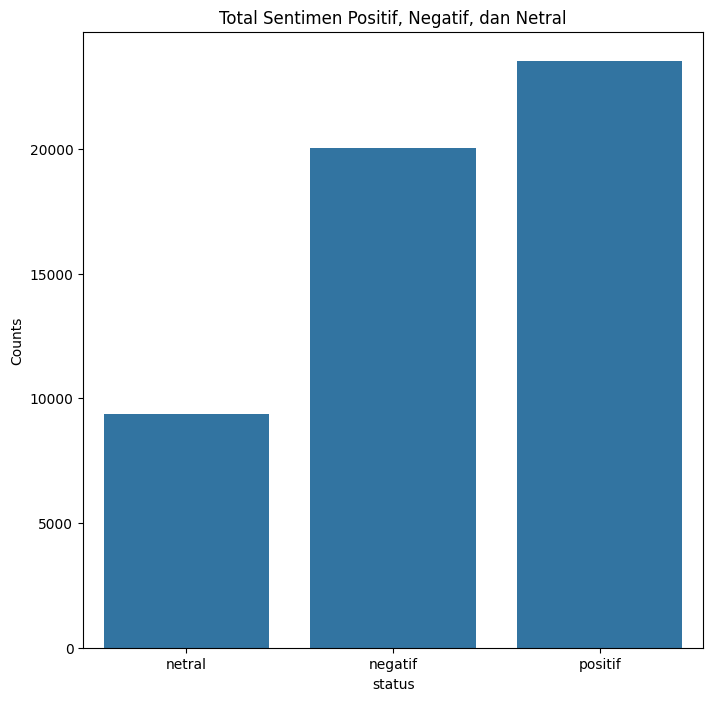

In [46]:
plt.figure(figsize=(8, 8))
sns.countplot(x="status", data=df)
plt.title("Total Sentimen Positif, Negatif, dan Netral")
plt.ylabel("Counts")
plt.show()

## Top Features

In [47]:
from collections import Counter
import itertools

In [48]:
def getWordCorpus(df, column):
    words = list(itertools.chain.from_iterable([sentence.split() for sentence in df[column]]))
    return words

In [49]:
positif_corpus = getWordCorpus(df[df.status == "positif"], "tweet")
negatif_corpus = getWordCorpus(df[df.status == "negatif"], "tweet")
netral_corpus = getWordCorpus(df[df.status == "netral"], "tweet")

### Positive Class

In [50]:
positif_counter = Counter(positif_corpus)
positif_most_common = positif_counter.most_common(20)
positif_most_common = dict(positif_most_common)

In [51]:
len(positif_corpus)

581906

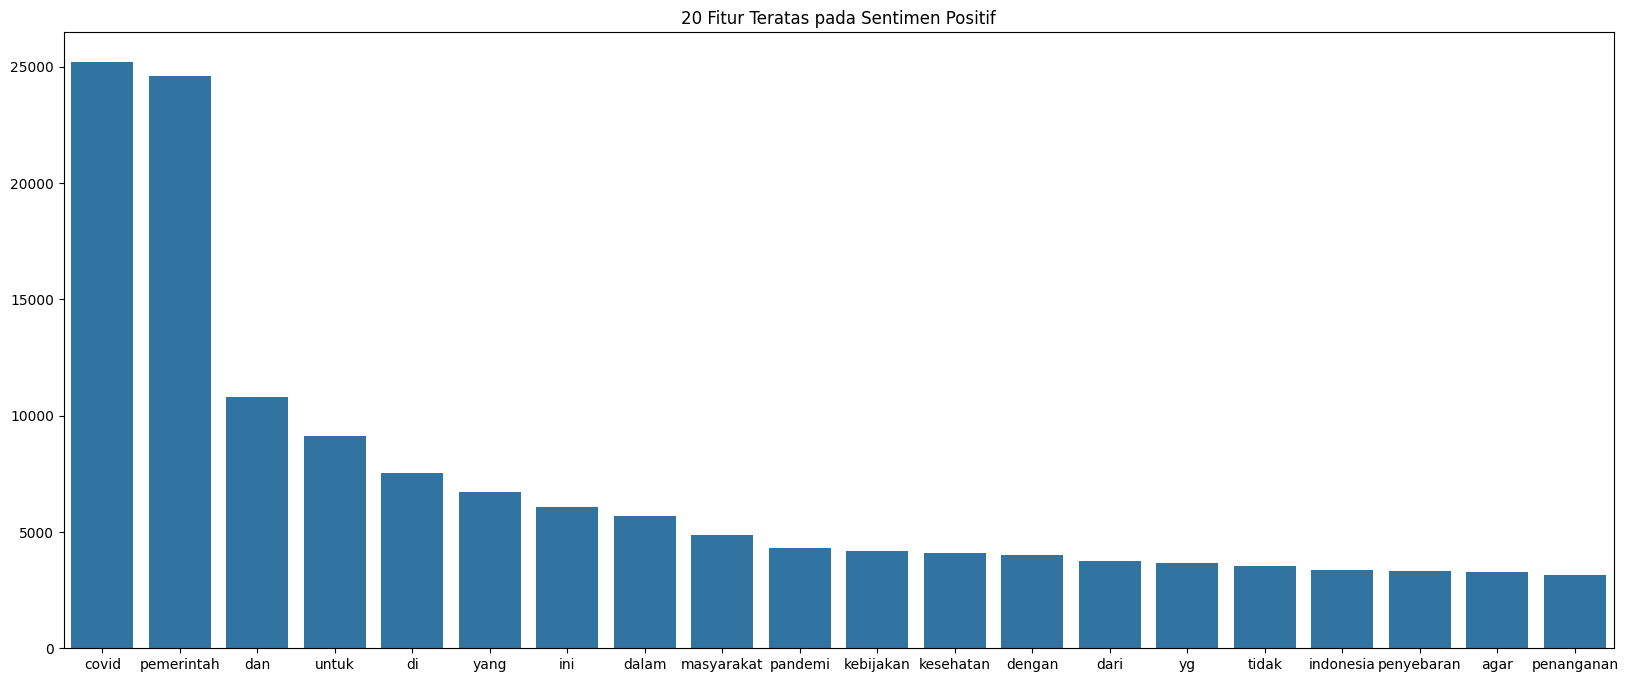

In [52]:
plt.figure(figsize = (20,8)) 
sns.barplot(x=list(positif_most_common.keys()), y=list(positif_most_common.values()))
plt.title("20 Fitur Teratas pada Sentimen Positif")
plt.show()

### Negative Class

In [53]:
negatif_counter = Counter(negatif_corpus)
negatif_most_common = negatif_counter.most_common(20)
negatif_most_common = dict(negatif_most_common)

In [54]:
len(negatif_corpus)

517207

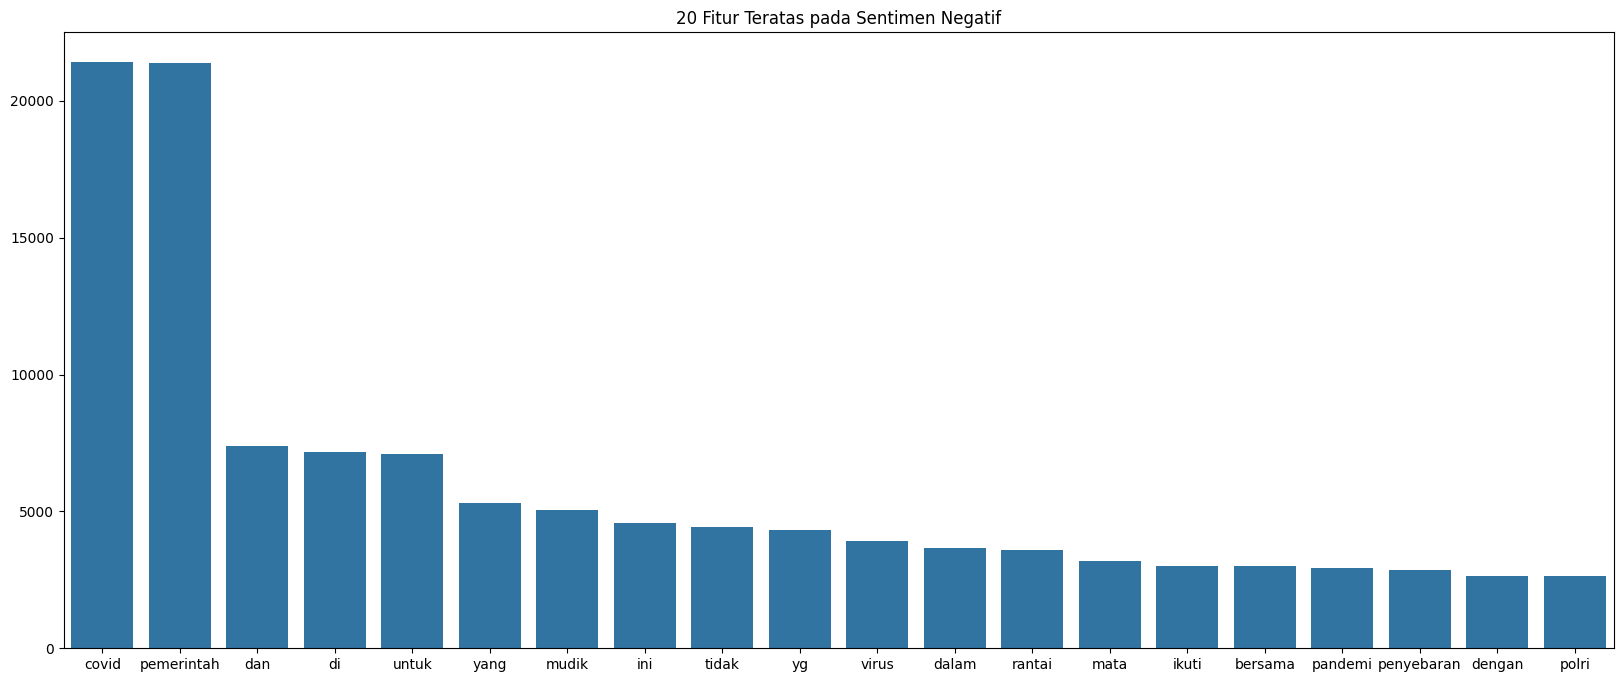

In [55]:
plt.figure(figsize = (20,8)) 
sns.barplot(x=list(negatif_most_common.keys()), y=list(negatif_most_common.values()))
plt.title("20 Fitur Teratas pada Sentimen Negatif")
plt.show()

### Neutral Class

In [56]:
netral_counter = Counter(netral_corpus)
netral_most_common = netral_counter.most_common(20)
netral_most_common = dict(netral_most_common)

In [57]:
len(netral_corpus)

175119

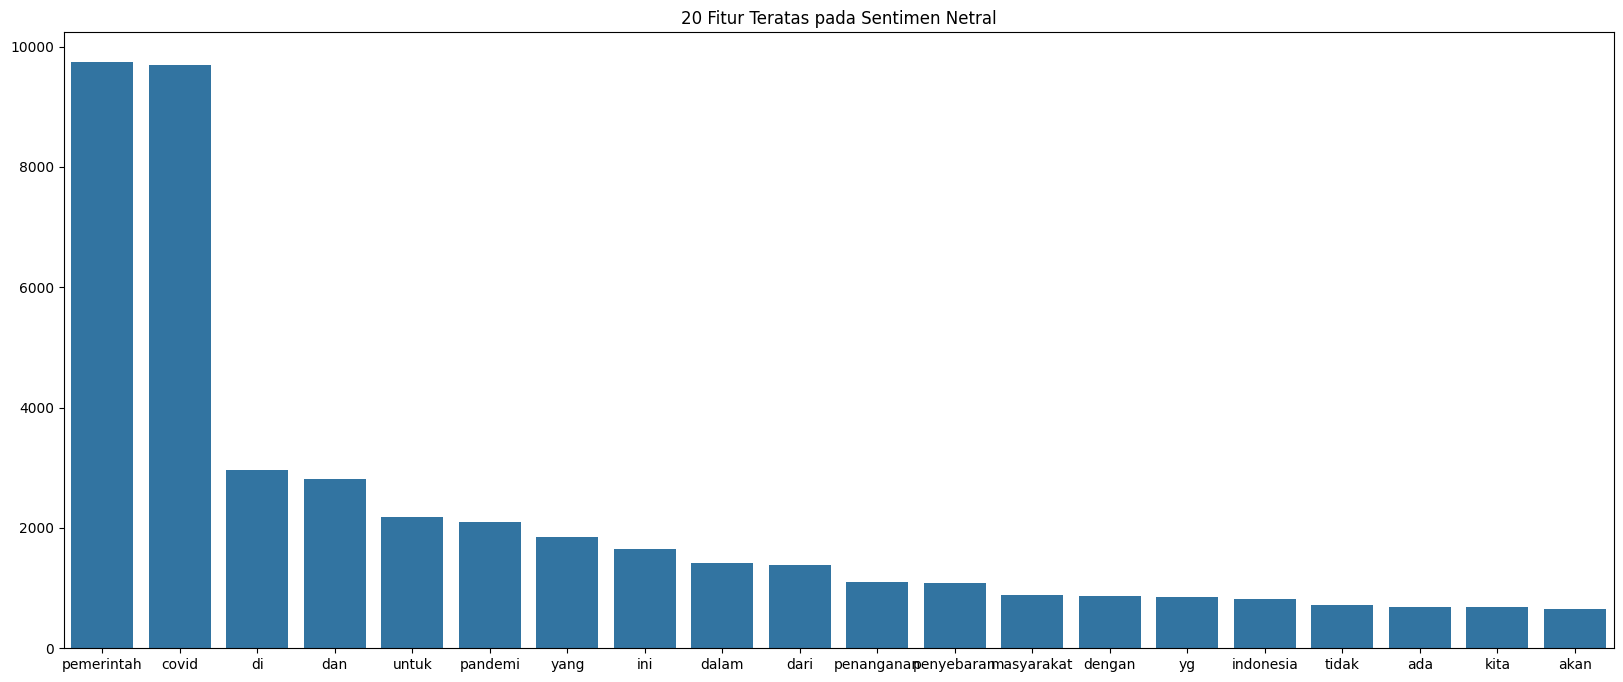

In [58]:
plt.figure(figsize = (20,8)) 
sns.barplot(x=list(netral_most_common.keys()), y=list(netral_most_common.values()))
plt.title("20 Fitur Teratas pada Sentimen Netral")
plt.show()

## Word Cloud

In [59]:
from wordcloud import WordCloud

### Positive Class

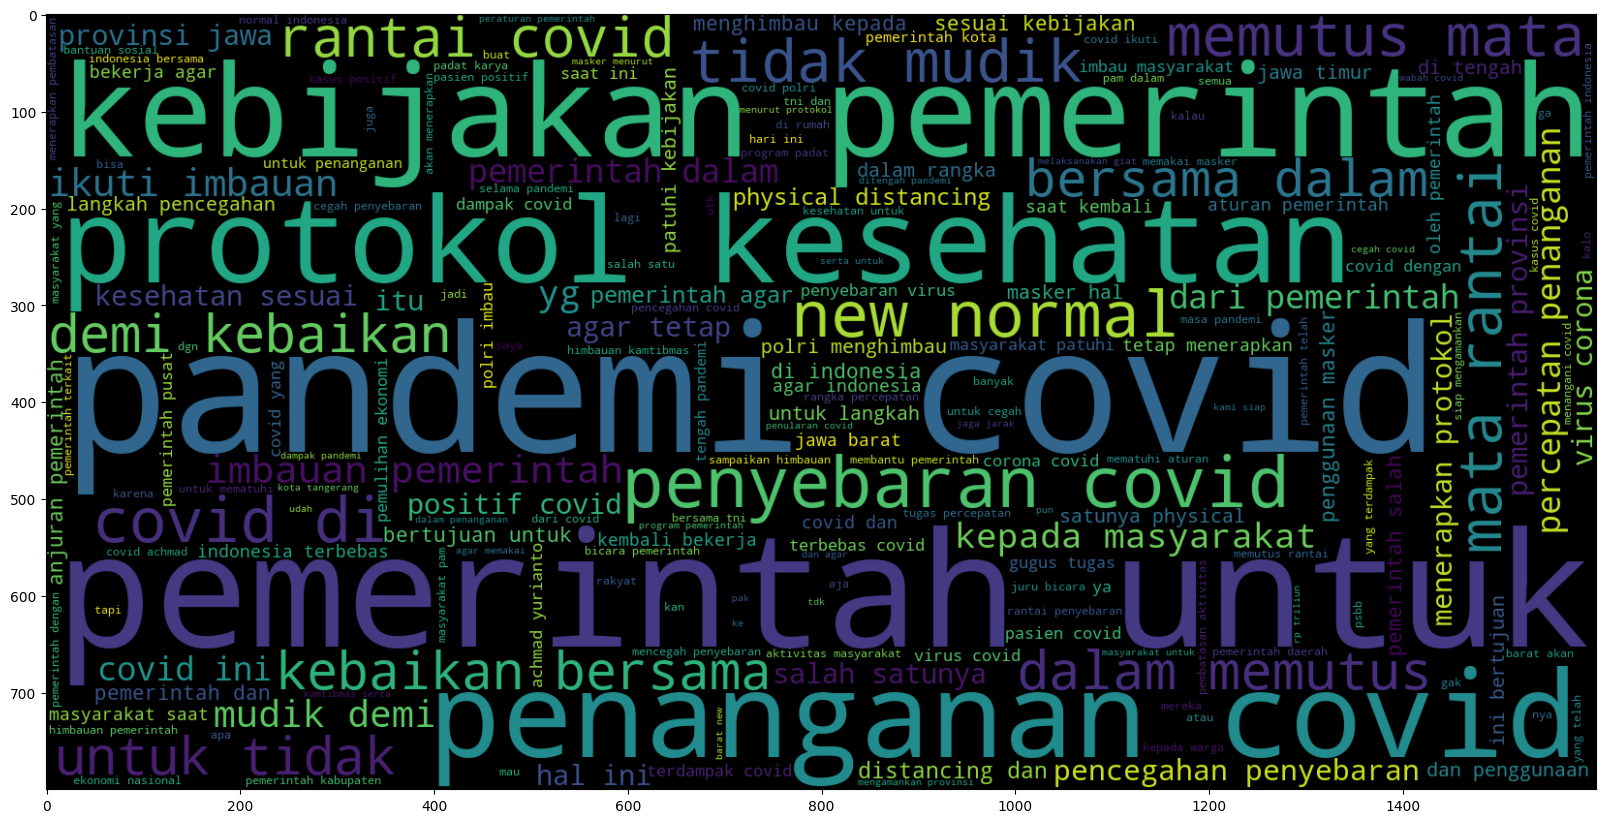

In [60]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df.loc[df['status']=='positif'].tweet))
plt.grid(False)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Class

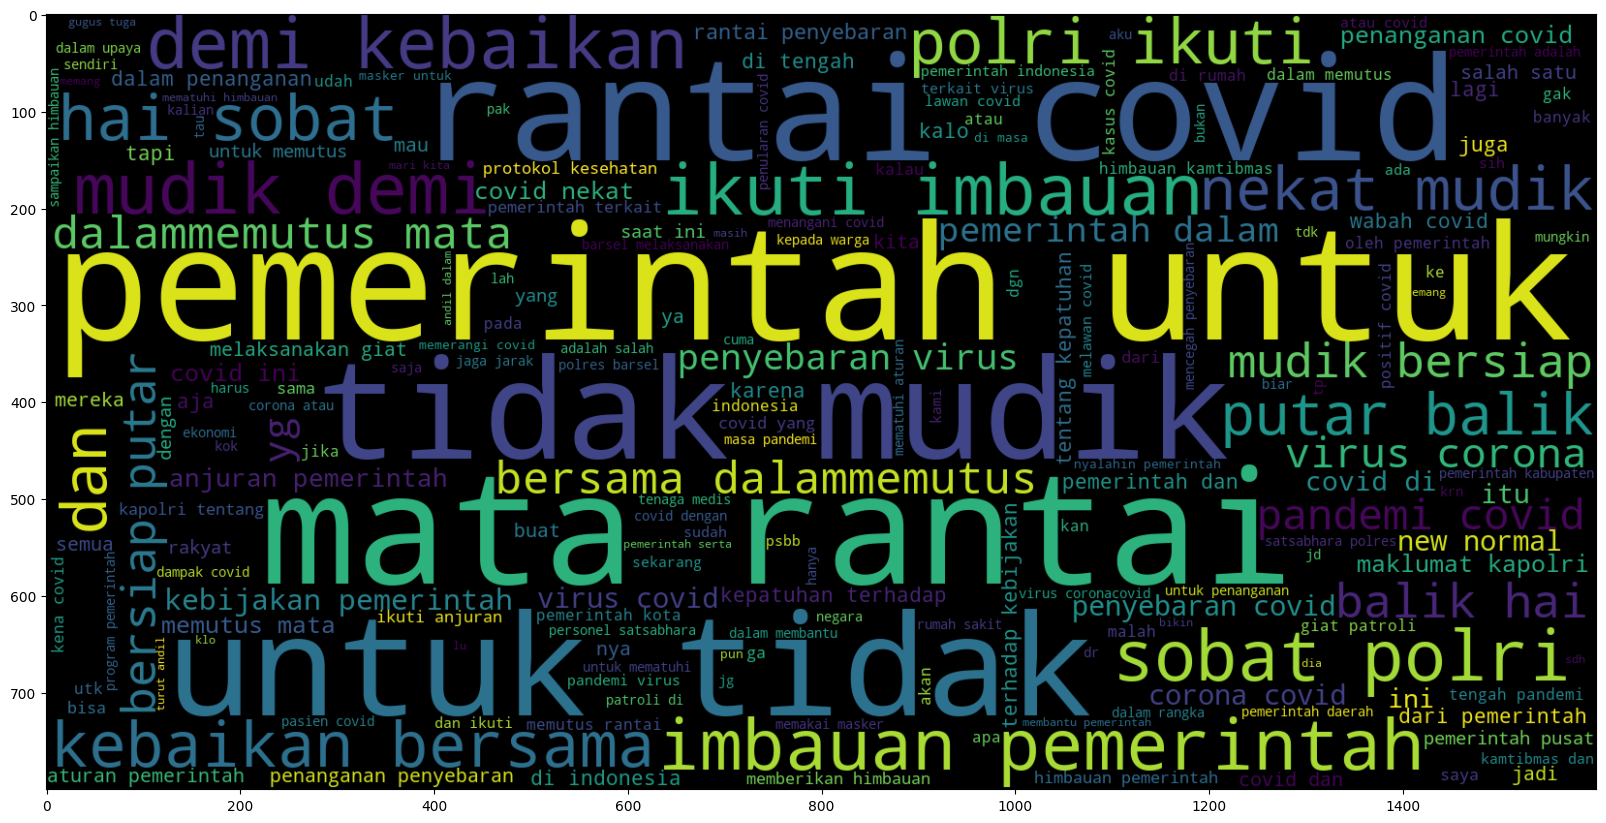

In [61]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df.loc[df['status']=='negatif'].tweet))
plt.grid(False)
plt.imshow(wc , interpolation = 'bilinear')

### Neutral Class

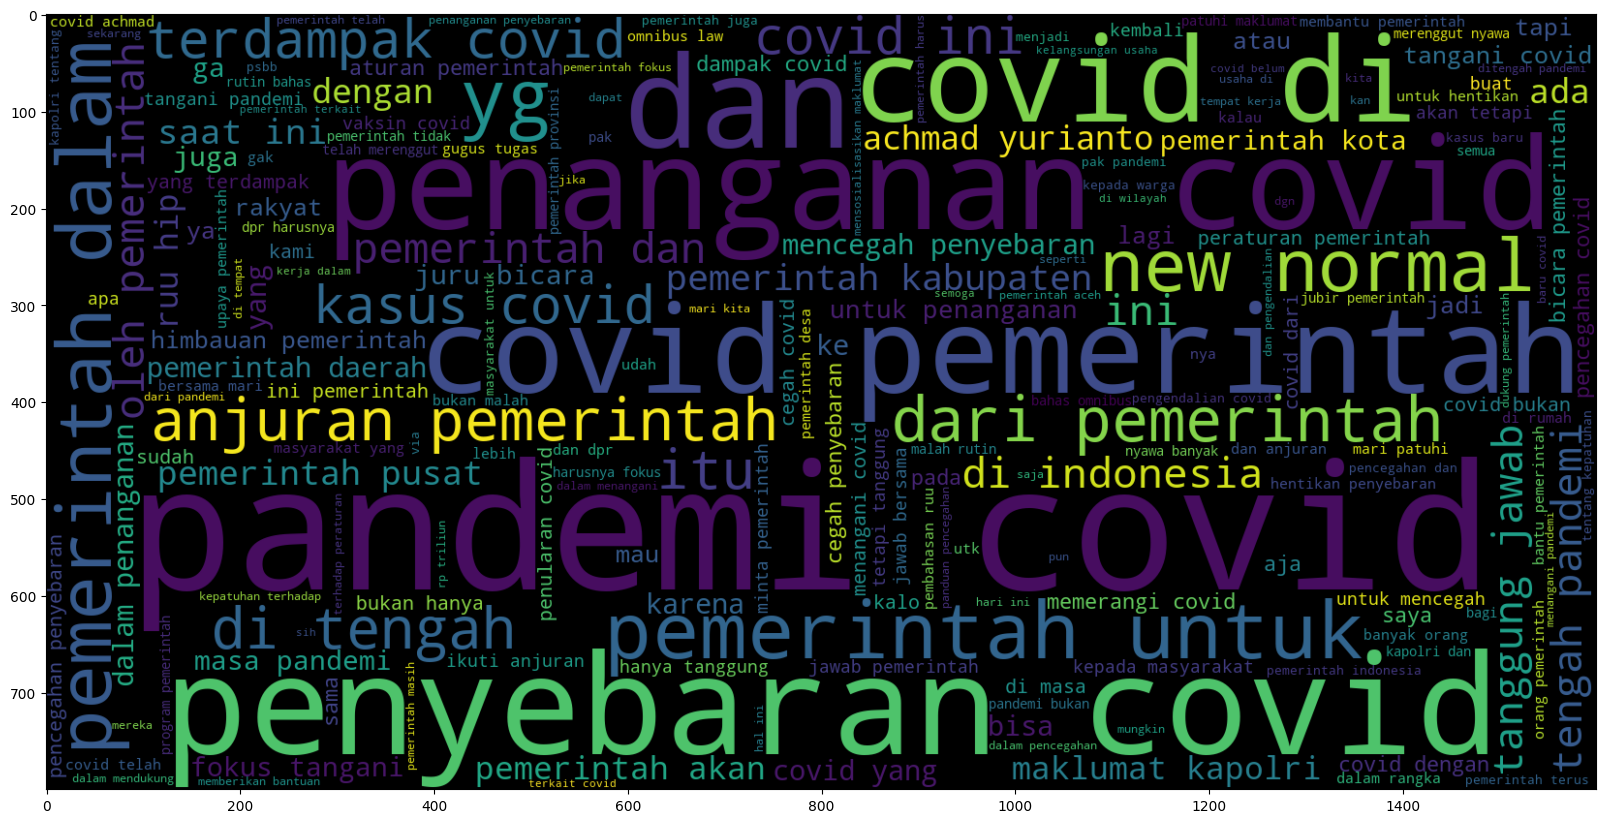

In [62]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df.loc[df['status']=='netral'].tweet))
plt.grid(False)
plt.imshow(wc , interpolation = 'bilinear')

In [63]:
df.to_csv("data/dataset-twitter-covid-19-feature-selection.csv")

# VECTORIZER

In [64]:
df = pd.read_csv("data/dataset-twitter-covid-19-feature-selection.csv")

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(df.iloc[:, 2]).ravel())

# SPLIT DATASET

In [66]:
X = tf_vector.transform(np.array(df.iloc[:, 2]).ravel())
y = np.array(df.iloc[:, 13]).ravel()

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELING

## Classification

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [69]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [70]:
print('Akurasi')
acc_logreg = accuracy_score(y_test, y_pred)
print(acc_logreg)

Akurasi
0.8823640483383686


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.86      0.89      0.88      3991
      netral       0.88      0.82      0.85      1869
     positif       0.90      0.90      0.90      4732

    accuracy                           0.88     10592
   macro avg       0.88      0.87      0.88     10592
weighted avg       0.88      0.88      0.88     10592



#  HANDLING IMBALANCE

## Undersampling

In [72]:
from imblearn.under_sampling import RandomUnderSampler

In [73]:
undersampler = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)

y_pred = logreg.predict(X_test)

In [74]:
print('Akurasi')
acc_under = accuracy_score(y_test, y_pred)
print(acc_under)

Akurasi
0.8324206948640483


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.85      0.82      0.84      3991
      netral       0.68      0.93      0.78      1869
     positif       0.91      0.81      0.85      4732

    accuracy                           0.83     10592
   macro avg       0.81      0.85      0.82     10592
weighted avg       0.85      0.83      0.83     10592



## Oversampling

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
oversampler = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_over, y_train_over)

y_pred = logreg.predict(X_test)

In [78]:
print('Akurasi')
acc_over = accuracy_score(y_test, y_pred)
print(acc_over)

Akurasi
0.8780211480362538


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.88      0.87      0.88      3991
      netral       0.78      0.93      0.85      1869
     positif       0.93      0.87      0.89      4732

    accuracy                           0.88     10592
   macro avg       0.86      0.89      0.87     10592
weighted avg       0.88      0.88      0.88     10592



## SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

y_pred = logreg.predict(X_test)

In [82]:
print('Akurasi')
acc_smote = accuracy_score(y_test, y_pred)
print(acc_smote)

Akurasi
0.8758496978851964


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.87      0.87      0.87      3991
      netral       0.79      0.91      0.84      1869
     positif       0.92      0.87      0.89      4732

    accuracy                           0.88     10592
   macro avg       0.86      0.88      0.87     10592
weighted avg       0.88      0.88      0.88     10592



## Cost-Sensitive Learning

In [84]:
len(y_train)

42367

In [85]:
series = pd.Series(y_train)
counts = series.value_counts()
print(counts)

positif    18789
negatif    16064
netral      7514
Name: count, dtype: int64


In [86]:
total_samples = len(y_train)

# hitung bobot kelas berdasarkan frekuensi relatif
class_weights = {
    "positif": total_samples / (3 * 18789),
    "negatif": total_samples / (3 * 16064),
    "netral": total_samples / (3 * 7514)
}

logreg = LogisticRegression(class_weight=class_weights, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [87]:
print('Akurasi')
acc_csl = accuracy_score(y_test, y_pred)
print(acc_csl)

Akurasi
0.8698074018126888


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.87      0.86      0.87      3991
      netral       0.76      0.93      0.84      1869
     positif       0.93      0.85      0.89      4732

    accuracy                           0.87     10592
   macro avg       0.85      0.88      0.86     10592
weighted avg       0.88      0.87      0.87     10592



## Bagging

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
bagging = BaggingClassifier(LogisticRegression(), random_state=42)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

c:\Users\akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\akbar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [91]:
print('Akurasi')
acc_bgg = accuracy_score(y_test, y_pred)
print(acc_bgg)

Akurasi
0.873583836858006


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.86      0.87      0.87      3991
      netral       0.87      0.81      0.84      1869
     positif       0.89      0.90      0.89      4732

    accuracy                           0.87     10592
   macro avg       0.87      0.86      0.87     10592
weighted avg       0.87      0.87      0.87     10592



## Tomek Links

In [93]:
from imblearn.under_sampling import TomekLinks

In [94]:
tomeklinks = TomekLinks()

X_train_tomek, y_train_tomek = tomeklinks.fit_resample(X_train, y_train)

logreg = LogisticRegression()

logreg.fit(X_train_tomek, y_train_tomek)

y_pred = logreg.predict(X_test)

In [95]:
print('Akurasi')
acc_tmk = accuracy_score(y_test, y_pred)
print(acc_tmk)

Akurasi
0.8755664652567976


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.86      0.87      0.87      3991
      netral       0.86      0.83      0.85      1869
     positif       0.90      0.89      0.89      4732

    accuracy                           0.88     10592
   macro avg       0.87      0.87      0.87     10592
weighted avg       0.88      0.88      0.88     10592



# EVALUATION

## Accuracy

In [97]:
models = ['Logistic Regression', 'Oversampling', 'Undersampling', 'SMOTE', 'Cost-Sensitive Learning', 'Bagging', 'Tomek Link']
accuracies = [acc_logreg, acc_under, acc_over, acc_smote, acc_csl, acc_bgg, acc_tmk]  

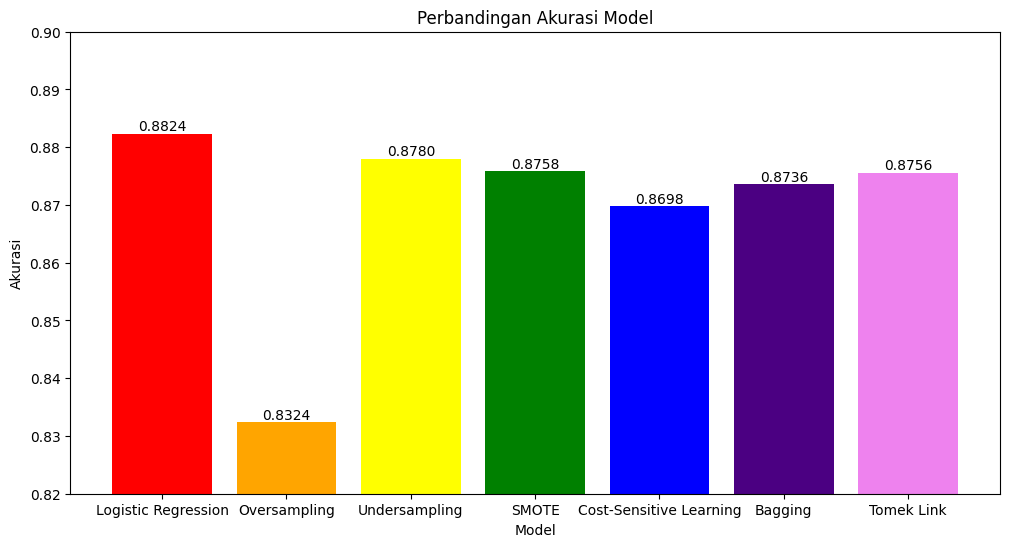

In [100]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

plt.figure(figsize=(12, 6))

bars = plt.bar(models, accuracies, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0.82, 0.9)
plt.grid(False)
plt.show()

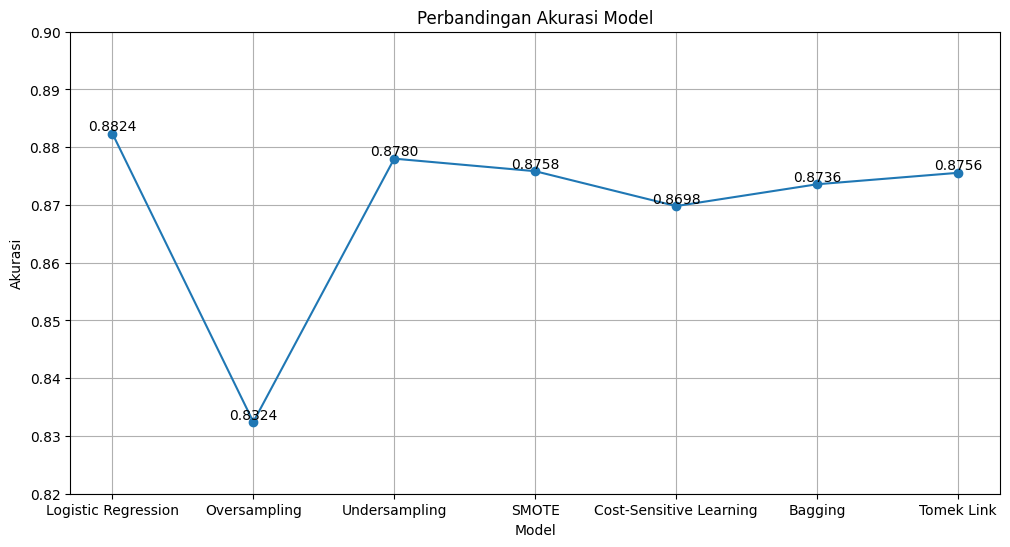

In [99]:
plt.figure(figsize=(12, 6))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

plt.plot(models, accuracies, marker='o', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0.82, 0.9)
plt.grid(True)
plt.show()